## Libraries & Modules

In [46]:
%reload_kedro

[09/26/23 03:16:28] INFO     Resolved project path as: /project/6013424/rahit/modspy-data.          ]8;id=330733;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=432387;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             To set a different path, run '%reload_kedro <project_root>'                           

[09/26/23 03:16:33] WARNING  /home/rahit/jupyter_py3/lib/python3.8/site-packages/kedro/framework/se ]8;id=941303;file:///cvmfs/soft.computecanada.ca/easybuild/software/2020/avx2/Core/python/3.8.10/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=462871;file:///cvmfs/soft.computecanada.ca/easybuild/software/2020/avx2/Core/python/3.8.10/lib/python3.8/warnings.py#109\109]8;;\
                             ssion/session.py:266: FutureWarning: ConfigLoader will be deprecated                  
                             in Kedro 0.19. Please use the OmegaConfigLoader instead. To consult                   
                             the documentation for OmegaConfigLoader, see here:                                    
                             https://docs.kedro.org/en/stable/configuration/advanced_configuration.                
                             html#omegaconfigloader                                                                
                               warnings.warn(                                                                      
                                                                                                                   

                    INFO     Kedro project ModSpy-Data                                              ]8;id=853467;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=20680;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=883039;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=605819;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

In [2]:
from loguru import logger
import string

# Data manipulation
import pandas as pd
import numpy as np
from modspy_data.helpers import KnowledgeGraphScores

# Distributed
import dask.dataframe as dd
from dask.distributed import Client, progress, performance_report
from dask_jobqueue import SLURMCluster
from dask import delayed
import dask

## Loading STRINGDB data

In [75]:
# Loading Interaction
ppi = catalog.load('string_interactions')
# Loading gene-protein map/alias file. Because ppi is indicated using stringdb ID.
ppi_alias = catalog.load('string_alias')

[09/26/23 04:06:27] INFO     Loading data from 'string_interactions' (DaskDataFrameDataSet)...  ]8;id=119227;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=155348;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/kedro/io/data_catalog.py#492\492]8;;\

                    INFO     Loading data from 'string_alias' (DaskDataFrameDataSet)...         ]8;id=988408;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=460556;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/kedro/io/data_catalog.py#492\492]8;;\

                    WARNING  /home/rahit/jupyter_py3/lib/python3.8/site-packages/dask/dataframe/io/ ]8;id=614062;file:///cvmfs/soft.computecanada.ca/easybuild/software/2020/avx2/Core/python/3.8.10/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=160703;file:///cvmfs/soft.computecanada.ca/easybuild/software/2020/avx2/Core/python/3.8.10/lib/python3.8/warnings.py#109\109]8;;\
                             csv.py:543: UserWarning: Warning gzip compression does not support                    
                             breaking apart files                                                                  
                             Please ensure that each individual file can fit in memory and                         
                             use the keyword ``blocksize=None to remove this message``                             
                             Setting ``blocksize=None``                                                            
                               warn(                                                                               
                                                                                                                   

                    WARNING  /home/rahit/jupyter_py3/lib/python3.8/site-packages/dask/dataframe/io/ ]8;id=305214;file:///cvmfs/soft.computecanada.ca/easybuild/software/2020/avx2/Core/python/3.8.10/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=874250;file:///cvmfs/soft.computecanada.ca/easybuild/software/2020/avx2/Core/python/3.8.10/lib/python3.8/warnings.py#109\109]8;;\
                             csv.py:625: ParserWarning: Falling back to the 'python' engine because                
                             the 'c' engine does not support regex separators (separators > 1 char                 
                             and different from '\s+' are interpreted as regex); you can avoid this                
                             warning by specifying engine='python'.                                                
                               head = reader(BytesIO(b_sample), nrows=sample_rows, **head_kwargs)                  
                                                                                                                   

In [76]:
ppi.columns

Index(['protein1', 'protein2', 'neighborhood', 'neighborhood_transferred',
       'fusion', 'cooccurence', 'homology', 'coexpression',
       'coexpression_transferred', 'experiments', 'experiments_transferred',
       'database', 'database_transferred', 'textmining',
       'textmining_transferred', 'combined_score'],
      dtype='object')

## Loading JVL

In [77]:
jvl = catalog.load('jvl_scored')

[09/26/23 04:06:31] INFO     Loading data from 'jvl_scored' (DaskDataFrameDataSet)...           ]8;id=541222;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=565316;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/kedro/io/data_catalog.py#492\492]8;;\

In [78]:
jvl.columns

Index(['QueryGene', 'SuppressorGene', 'go_n_common_ancestors_max',
       'go_n_common_ancestors_avg', 'go_n_common_ancestors_bma',
       'go_n_union_ancestors_max', 'go_n_union_ancestors_avg',
       'go_n_union_ancestors_bma', 'go_batet_max', 'go_batet_avg',
       'go_batet_bma', 'go_batet_log_max', 'go_batet_log_avg',
       'go_batet_log_bma', 'go_resnik_max', 'go_resnik_avg', 'go_resnik_bma',
       'go_resnik_scaled_max', 'go_resnik_scaled_avg', 'go_resnik_scaled_bma',
       'go_lin_max', 'go_lin_avg', 'go_lin_bma', 'go_jiang_max',
       'go_jiang_avg', 'go_jiang_bma', 'go_jiang_seco_max',
       'go_jiang_seco_avg', 'go_jiang_seco_bma'],
      dtype='object')

## Dask multiprocessing and cluster management

In [17]:
# Use all 8 cores
cluster = SLURMCluster(cores=8,
                       processes=2,
                       memory="4GB",
                       account="def-mtarailo_cpu",
                       walltime="00:60:00",
                       job_script_prologue=['module load gcc/9.3.0 python/3.10.2 arrow/11 spark/3.3.0 nodejs scipy-stack/2023b ipykernel/2023b'])
cluster

[09/22/23 00:54:04] WARNING  /home/rahit/projects/def-mtarailo/rahit/python_environments/.modspy310 ]8;id=808853;file:///cvmfs/soft.computecanada.ca/easybuild/software/2020/avx2/Core/python/3.10.2/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=943986;file:///cvmfs/soft.computecanada.ca/easybuild/software/2020/avx2/Core/python/3.10.2/lib/python3.10/warnings.py#109\109]8;;\
                             /lib/python3.10/site-packages/distributed/node.py:182: UserWarning:                   
                             Port 8787 is already in use.                                                          
                             Perhaps you already have a cluster running?                                           
                             Hosting the HTTP server on port 37700 instead                                         
                               warnings.warn(                                                                      
                                                                                                                   

                    INFO     State start                                                          ]8;id=998127;file:///home/rahit/projects/def-mtarailo/rahit/python_environments/.modspy310/lib/python3.10/site-packages/distributed/scheduler.py\scheduler.py]8;;\:]8;id=466321;file:///home/rahit/projects/def-mtarailo/rahit/python_environments/.modspy310/lib/python3.10/site-packages/distributed/scheduler.py#1684\1684]8;;\

                    INFO       Scheduler at: tcp://199.241.166.4:43654                            ]8;id=661707;file:///home/rahit/projects/def-mtarailo/rahit/python_environments/.modspy310/lib/python3.10/site-packages/distributed/scheduler.py\scheduler.py]8;;\:]8;id=353395;file:///home/rahit/projects/def-mtarailo/rahit/python_environments/.modspy310/lib/python3.10/site-packages/distributed/scheduler.py#3970\3970]8;;\

                    INFO       dashboard at:  http://199.241.166.4:37700/status                   ]8;id=52055;file:///home/rahit/projects/def-mtarailo/rahit/python_environments/.modspy310/lib/python3.10/site-packages/distributed/scheduler.py\scheduler.py]8;;\:]8;id=962078;file:///home/rahit/projects/def-mtarailo/rahit/python_environments/.modspy310/lib/python3.10/site-packages/distributed/scheduler.py#3985\3985]8;;\

                    INFO     Registering Worker plugin shuffle                                    ]8;id=828430;file:///home/rahit/projects/def-mtarailo/rahit/python_environments/.modspy310/lib/python3.10/site-packages/distributed/scheduler.py\scheduler.py]8;;\:]8;id=970044;file:///home/rahit/projects/def-mtarailo/rahit/python_environments/.modspy310/lib/python3.10/site-packages/distributed/scheduler.py#7498\7498]8;;\

Dashboard: http://199.241.166.4:37700/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tcp://199.241.166.4:43654,Workers: 0
Dashboard: http://199.241.166.4:37700/status,Total threads: 0
Started: Just now,Total memory: 0 B


In [36]:
# Use all 8 cores
cluster = SLURMCluster(cores=8,
                       processes=1,
                       memory="4GB",
                       account="def-mtarailo_cpu",
                       walltime="00:10:00",
                       log_directory='../logs')
cluster

[09/26/23 02:55:42] INFO     State start                                                          ]8;id=912034;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py\scheduler.py]8;;\:]8;id=309410;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py#1615\1615]8;;\

                    INFO       Scheduler at:  tcp://10.29.84.166:34264                            ]8;id=38900;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py\scheduler.py]8;;\:]8;id=699525;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py#3860\3860]8;;\

                    INFO       dashboard at:                     :8787                            ]8;id=705015;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py\scheduler.py]8;;\:]8;id=431508;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py#3862\3862]8;;\

In [35]:
cluster.close()

[09/26/23 02:55:30] INFO     Scheduler closing...                                                 ]8;id=214820;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py\scheduler.py]8;;\:]8;id=91583;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py#3925\3925]8;;\

                    INFO     Scheduler closing all comms                                          ]8;id=82060;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py\scheduler.py]8;;\:]8;id=79553;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py#3947\3947]8;;\

In [7]:
print(cluster.job_script())

#!/usr/bin/env bash

#SBATCH -J dask-worker
#SBATCH -e ../logs/dask-worker-%J.err
#SBATCH -o ../logs/dask-worker-%J.out
#SBATCH -A def-mtarailo_cpu
#SBATCH -n 1
#SBATCH --cpus-per-task=8
#SBATCH --mem=15G
#SBATCH -t 00:10:00

/home/rahit/jupyter_py3/bin/python -m distributed.cli.dask_worker tcp://10.29.84.181:40464 --nthreads 8 --memory-limit 14.90GiB --name dummy-name --nanny --death-timeout 60



In [37]:
client = Client(cluster)
client

[09/26/23 02:55:53] INFO     Receive client connection:                                           ]8;id=832587;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py\scheduler.py]8;;\:]8;id=384024;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py#5228\5228]8;;\
                             Client-bc71cc5c-5c39-11ee-81f5-7079909e15b5                                           

                    INFO     Starting established connection to tcp://10.29.84.166:59770                ]8;id=393786;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py\core.py]8;;\:]8;id=659633;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py#867\867]8;;\

Connection method: Cluster object,Cluster type: dask_jobqueue.SLURMCluster
Dashboard: http://10.29.84.166:8787/status,
Dashboard: http://10.29.84.166:8787/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tcp://10.29.84.166:34264,Workers: 0
Dashboard: http://10.29.84.166:8787/status,Total threads: 0
Started: Just now,Total memory: 0 B


In [79]:
cluster.scale(2)

In [81]:
!squeue -u $USER

            JOBID     USER              ACCOUNT           NAME  ST  TIME_LEFT NODES CPUS TRES_PER_N MIN_MEM NODELIST (REASON) 
         11490091    rahit     def-mtarailo_cpu    dask-worker   R       9:55     1    8        N/A      4G gra708 (None) 
         11490092    rahit     def-mtarailo_cpu    dask-worker   R       9:55     1    8        N/A      4G gra708 (None) 
         11489057    rahit     def-mtarailo_cpu    interactive   R   21:10:32     1    1        N/A     16G gra804 (None) 


[09/26/23 04:06:55] INFO     Register worker <WorkerState 'tcp://10.29.84.69:38576', name:        ]8;id=261508;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py\scheduler.py]8;;\:]8;id=689345;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py#4212\4212]8;;\
                             SLURMCluster-0, status: init, memory: 0, processing: 0>                               

                    INFO     Starting worker compute stream, tcp://10.29.84.69:38576              ]8;id=381516;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py\scheduler.py]8;;\:]8;id=828622;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py#5468\5468]8;;\

                    INFO     Starting established connection to tcp://10.29.84.69:35046                 ]8;id=712841;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py\core.py]8;;\:]8;id=148765;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py#867\867]8;;\

                    INFO     Register worker <WorkerState 'tcp://10.29.84.69:46399', name:        ]8;id=387279;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py\scheduler.py]8;;\:]8;id=534078;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py#4212\4212]8;;\
                             SLURMCluster-4, status: init, memory: 0, processing: 0>                               

                    INFO     Starting worker compute stream, tcp://10.29.84.69:46399              ]8;id=768517;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py\scheduler.py]8;;\:]8;id=139289;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py#5468\5468]8;;\

                    INFO     Starting established connection to tcp://10.29.84.69:35044                 ]8;id=107285;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py\core.py]8;;\:]8;id=368517;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py#867\867]8;;\

## Normalization & Sanitize

In [82]:
# apply lowercasing and removing punctuation to the textual column
jvl['QueryGene_norm'] = jvl['QueryGene'].str.lower().str.replace('[{}]-'.format(string.punctuation), '')
jvl['SuppressorGene_norm'] = jvl['SuppressorGene'].str.lower().str.replace('[{}]-'.format(string.punctuation), '')
ppi_alias['alias_norm'] = ppi_alias['alias'].str.lower().str.replace('[{}]-'.format(string.punctuation), '')

[09/26/23 04:07:07] WARNING  /home/rahit/jupyter_py3/lib/python3.8/site-packages/dask/dataframe/acc ]8;id=770579;file:///cvmfs/soft.computecanada.ca/easybuild/software/2020/avx2/Core/python/3.8.10/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=661600;file:///cvmfs/soft.computecanada.ca/easybuild/software/2020/avx2/Core/python/3.8.10/lib/python3.8/warnings.py#109\109]8;;\
                             essor.py:89: FutureWarning: The default value of regex will change                    
                             from True to False in a future version.                                               
                               out = getattr(getattr(obj, accessor, obj), attr)(*args, **kwargs)                   
                                                                                                                   

                    WARNING  /home/rahit/jupyter_py3/lib/python3.8/site-packages/dask/dataframe/acc ]8;id=464799;file:///cvmfs/soft.computecanada.ca/easybuild/software/2020/avx2/Core/python/3.8.10/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=621499;file:///cvmfs/soft.computecanada.ca/easybuild/software/2020/avx2/Core/python/3.8.10/lib/python3.8/warnings.py#109\109]8;;\
                             essor.py:89: FutureWarning: The default value of regex will change                    
                             from True to False in a future version.                                               
                               out = getattr(getattr(obj, accessor, obj), attr)(*args, **kwargs)                   
                                                                                                                   

                    WARNING  /home/rahit/jupyter_py3/lib/python3.8/site-packages/dask/dataframe/acc ]8;id=5658;file:///cvmfs/soft.computecanada.ca/easybuild/software/2020/avx2/Core/python/3.8.10/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=796712;file:///cvmfs/soft.computecanada.ca/easybuild/software/2020/avx2/Core/python/3.8.10/lib/python3.8/warnings.py#109\109]8;;\
                             essor.py:89: FutureWarning: The default value of regex will change                    
                             from True to False in a future version.                                               
                               out = getattr(getattr(obj, accessor, obj), attr)(*args, **kwargs)                   
                                                                                                                   

In [83]:
# Removing duplicates
jvl = jvl.drop_duplicates(subset=('QueryGene', 'SuppressorGene'), keep='first')
ppi_alias = ppi_alias.drop_duplicates(subset='alias_norm', keep='first')

## Add interactions to JVL

In [84]:
# Adding alias for query gene
_jvl = jvl.merge(ppi_alias, how='left', left_on='QueryGene_norm', right_on="alias_norm")
# Adding alias for suppressor gene
_jvl = _jvl.merge(ppi_alias, how='left', left_on='SuppressorGene_norm', right_on="alias_norm")
# AAdding StringDB interaction score
_jvl = _jvl.merge(ppi, how='left', left_on=['protein_x','protein_y'], right_on=['protein1', 'protein2'])

In [85]:
jvl_df = _jvl.compute()

In [87]:
catalog.save('jvl_features', jvl_df)

[09/26/23 04:09:36] INFO     Saving data to 'jvl_features' (CSVDataSet)...                      ]8;id=192085;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=621769;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/kedro/io/data_catalog.py#531\531]8;;\

[09/26/23 04:17:06] INFO     Connection to tcp://10.29.84.69:35044 has been closed.                     ]8;id=393549;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py\core.py]8;;\:]8;id=899833;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py#877\877]8;;\

                    INFO     Remove worker <WorkerState 'tcp://10.29.84.69:46399', name:          ]8;id=944287;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py\scheduler.py]8;;\:]8;id=729820;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py#4795\4795]8;;\
                             SLURMCluster-4, status: running, memory: 0, processing: 0>                            

                    INFO     Removing comms to tcp://10.29.84.69:46399                                 ]8;id=649569;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py\core.py]8;;\:]8;id=408932;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py#1480\1480]8;;\

                    INFO     Connection to tcp://10.29.84.69:35046 has been closed.                     ]8;id=669243;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py\core.py]8;;\:]8;id=897245;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py#877\877]8;;\

                    INFO     Remove worker <WorkerState 'tcp://10.29.84.69:38576', name:          ]8;id=742146;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py\scheduler.py]8;;\:]8;id=16047;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py#4795\4795]8;;\
                             SLURMCluster-0, status: running, memory: 0, processing: 0>                            

                    INFO     Removing comms to tcp://10.29.84.69:38576                                 ]8;id=482649;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py\core.py]8;;\:]8;id=54546;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py#1480\1480]8;;\

                    INFO     Lost all workers                                                     ]8;id=157455;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py\scheduler.py]8;;\:]8;id=912248;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py#4875\4875]8;;\

---------------------------------------------------------------------------

## Below is the spaghetti code for the above code

# Add PPI data to dataset

In [11]:
jvl_smpld = jvl_ddf.sample(frac=0.2)

In [27]:
protein_alias_df_delayed = delayed(protein_alias_df)

In [32]:
protein_alias_df_future = client.scatter(protein_alias_df, broadcast=True)

[09/25/23 17:06:02] INFO     Event loop was unresponsive in Scheduler for 4.34s.  This is often caused  ]8;id=740048;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py\core.py]8;;\:]8;id=854984;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py#595\595]8;;\
                             by long-running GIL-holding functions or moving large chunks of data. This            
                             can cause timeouts and instability.                                                   

                    INFO     Register worker <WorkerState 'tcp://10.29.84.7:39550', name:         ]8;id=859803;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py\scheduler.py]8;;\:]8;id=425670;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py#4212\4212]8;;\
                             SLURMCluster-0, status: init, memory: 0, processing: 0>                               

                    INFO     Starting worker compute stream, tcp://10.29.84.7:39550               ]8;id=156180;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py\scheduler.py]8;;\:]8;id=72578;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py#5468\5468]8;;\

                    INFO     Starting established connection to tcp://10.29.84.7:58076                  ]8;id=302076;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py\core.py]8;;\:]8;id=463096;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py#867\867]8;;\

[09/25/23 17:06:04] INFO     Register worker <WorkerState 'tcp://10.29.85.165:39873', name:       ]8;id=76316;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py\scheduler.py]8;;\:]8;id=80932;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py#4212\4212]8;;\
                             SLURMCluster-1, status: init, memory: 0, processing: 0>                               

                    INFO     Starting worker compute stream, tcp://10.29.85.165:39873             ]8;id=677991;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py\scheduler.py]8;;\:]8;id=912923;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py#5468\5468]8;;\

                    INFO     Starting established connection to tcp://10.29.85.165:47792                ]8;id=604717;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py\core.py]8;;\:]8;id=162712;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py#867\867]8;;\

In [33]:
protein_alias_df_future

<Future: finished, type: pandas.core.frame.DataFrame, key: DataFrame-ad029b459c57e997ba1990903fd2145e>

In [13]:
protein_alias_df.shape

(3889207, 3)

In [53]:

def get_string_protein_id(protein_alias_df, gene_name):
    """Get STRING DB protein id using their alias file

    Arguments:
        protein_alias_df {DataFrame} -- Loaded alias file dataframe
        gene_name {string} -- Gene name

    Returns:
        string -- Returns protein ID. NOTE: STRING DB tag single protein with a gene (as of Jan 2020). That assumption is taken into account here.
    """
    proteins = protein_alias_df[protein_alias_df["alias"].str.match(
        "^"+str(gene_name)+"$", case=False, na=False)]
    # proteins = aliases.compute()
    if len(proteins.index) == 0:
        logger.debug("NO proteins found for {}".format(gene_name))
        return None
    elif len(proteins.index) > 1:
        logger.debug("Multiple proteins found for {}".format(gene_name))
    return proteins.iloc[0]['protein']


# def get_interaction_score(row, protein_interaction_df, protein_alias_df, col_names=('target_gene_symbol', 'gene_symbol')):
#     target_gene = row[col_names[0]]
#     query_gene = row[col_names[1]]
#     target_protein = get_string_protein_id(protein_alias_df, target_gene)
#     query_protein = get_string_protein_id(protein_alias_df, query_gene)
#     proteins = [target_protein, query_protein]
#     logger.debug(f"{target_gene} - {query_gene}")
#     # empty_interaction = pd.DataFrame(proteins + np.zeros(len(list(protein_interaction_df.columns))-2), columns=protein_interaction_df.columns)
#     empty_interaction = pd.concat([row, pd.Series(proteins + np.zeros(len(list(
#         protein_interaction_df.columns))-2).tolist(), index=protein_interaction_df.columns)])
#     if target_protein and query_protein:
#         interactions = protein_interaction_df[(protein_interaction_df["protein1"].isin(
#             proteins)) & (protein_interaction_df["protein2"].isin(proteins))]
#         if interactions.empty:
#             return empty_interaction
#         interaction_with_top_score = interactions.loc[interactions['combined_score'].idxmax(
#         )].values.tolist()    # Using the interaction that has BEST combined score
#         return pd.concat([row, pd.Series(interaction_with_top_score, index=protein_interaction_df.columns)])
#     else:
#         return empty_interaction
    
def get_interaction_score(row, protein_interaction_df, protein_alias_df, col_names=('target_gene_symbol', 'modifier_gene_symbol')):
    target_gene = row[col_names[0]]
    query_gene = row[col_names[1]]
    target_protein = get_string_protein_id(protein_alias_df, target_gene)
    query_protein = get_string_protein_id(protein_alias_df, query_gene)
    proteins = [target_protein, query_protein]
    logger.debug(f"{target_gene} - {query_gene}")
    # empty_interaction = pd.DataFrame(proteins + np.zeros(len(list(protein_interaction_df.columns))-2), columns=protein_interaction_df.columns)
    empty_interaction = pd.Series(proteins + np.zeros(len(list(
        protein_interaction_df.columns))-2).tolist(), index=protein_interaction_df.columns)
    if target_protein and query_protein:
        interactions = protein_interaction_df[(protein_interaction_df["protein1"].isin(
            proteins)) & (protein_interaction_df["protein2"].isin(proteins))]
        if interactions.empty:
            return empty_interaction
        interaction_with_top_score = interactions.loc[interactions['combined_score'].idxmax(
        )].values.tolist()    # Using the interaction that has BEST combined score
        return pd.Series(interaction_with_top_score, index=protein_interaction_df.columns)
    else:
        return empty_interaction
    
def add_stringdb_partition(df_partition, col_names=('target_gene_symbol', 'modifier_gene_symbol')):
    protein_interaction_df = catalog.load('string_interactions')
    protein_alias_df = catalog.load('string_alias')
    # pickle.dumps(protein_interaction_df)
    df_partition[protein_interaction_df.columns] = df_partition.apply(
        lambda row: get_interaction_score(row, protein_interaction_df, protein_alias_df, ('QueryGene', 'SuppressorGene')), 
        axis=1
    )
    return df_partition

def add_protein_alias(row, protein_alias_df, col_names=('target_gene_symbol', 'gene_symbol')):
    target_gene = row[col_names[0]]
    query_gene = row[col_names[1]]
    target_protein = get_string_protein_id(protein_alias_df, target_gene)
    query_protein = get_string_protein_id(protein_alias_df, query_gene)
    proteins = [target_protein, query_protein]
    return pd.Series(proteins, index=['target_protein', 'query_protein'])


def test_dask(row, protein_alias_df, test_arg=['t1']):
    col_names=('QueryGene', 'SuppressorGene')
    target_gene = row['QueryGene']
    query_gene = row['SuppressorGene']
    protein_alias_df = protein_alias_df_future.result()
    print(protein_alias_df.shape)
    # target_protein = get_string_protein_id(protein_alias_df, target_gene)
    # query_protein = get_string_protein_id(protein_alias_df, query_gene)
    # proteins = [target_protein, query_protein]
    return pd.Series([protein_alias_df.iloc[0,0],protein_alias_df.iloc[1,1]], index=['protein1', 'protein2'])
    # return pd.Series([protein_alias_df.iloc[0,0],protein_alias_df.iloc[1,1]], index=['protein1', 'protein2'])

@delayed
def test_part(df, sc_df, cols):
    return df.apply(test_dask, args=[sc_df, ['QueryGene', 'SuppressorGene']], axis=1)
    
# def add_protein_alias_partition(df_partition, protein_alias_df):
#     df_partition[['target_protein', 'query_protein']] = df_partition.apply(
#         lambda row: add_protein_alias(row, protein_alias_df, ('QueryGene', 'SuppressorGene')), 
#         axis=1
#     )
#     return df_partition

In [22]:
jvl.columns

Index(['QueryGene', 'SuppressorGene', 'go_n_common_ancestors_max',
       'go_n_common_ancestors_avg', 'go_n_common_ancestors_bma',
       'go_n_union_ancestors_max', 'go_n_union_ancestors_avg',
       'go_n_union_ancestors_bma', 'go_batet_max', 'go_batet_avg',
       'go_batet_bma', 'go_batet_log_max', 'go_batet_log_avg',
       'go_batet_log_bma', 'go_resnik_max', 'go_resnik_avg', 'go_resnik_bma',
       'go_resnik_scaled_max', 'go_resnik_scaled_avg', 'go_resnik_scaled_bma',
       'go_lin_max', 'go_lin_avg', 'go_lin_bma', 'go_jiang_max',
       'go_jiang_avg', 'go_jiang_bma', 'go_jiang_seco_max',
       'go_jiang_seco_avg', 'go_jiang_seco_bma', 'QueryGene_norm',
       'SuppressorGene_norm'],
      dtype='object')

In [ ]:
jvl_ddf = dd.merge(merged_ddf, ppi, how='left', left_on=['protein_x','protein_y'], right_on=['protein1', 'protein2'])

In [29]:
jvl_df = merged_ddf.compute()

In [30]:
jvl_df.columns

Index(['QueryGene', 'SuppressorGene', 'go_n_common_ancestors_max',
       'go_n_common_ancestors_avg', 'go_n_common_ancestors_bma',
       'go_n_union_ancestors_max', 'go_n_union_ancestors_avg',
       'go_n_union_ancestors_bma', 'go_batet_max', 'go_batet_avg',
       'go_batet_bma', 'go_batet_log_max', 'go_batet_log_avg',
       'go_batet_log_bma', 'go_resnik_max', 'go_resnik_avg', 'go_resnik_bma',
       'go_resnik_scaled_max', 'go_resnik_scaled_avg', 'go_resnik_scaled_bma',
       'go_lin_max', 'go_lin_avg', 'go_lin_bma', 'go_jiang_max',
       'go_jiang_avg', 'go_jiang_bma', 'go_jiang_seco_max',
       'go_jiang_seco_avg', 'go_jiang_seco_bma', 'QueryGene_norm',
       'SuppressorGene_norm', 'protein_x', 'alias_x', 'source_x',
       'alias_norm_x', 'protein_y', 'alias_y', 'source_y', 'alias_norm_y'],
      dtype='object')

In [21]:
merged_df = merged_ddf.compute()

[09/26/23 01:17:54] ERROR    Task exception was never retrieved                                 ]8;id=540220;file:///cvmfs/soft.computecanada.ca/easybuild/software/2020/avx2/Core/python/3.8.10/lib/python3.8/asyncio/base_events.py\base_events.py]8;;\:]8;id=89394;file:///cvmfs/soft.computecanada.ca/easybuild/software/2020/avx2/Core/python/3.8.10/lib/python3.8/asyncio/base_events.py#1707\1707]8;;\
                             future: <Task finished name='Task-69936'                                              
                             coro=<Client._gather.<locals>.wait() done, defined at                                 
                             /home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/cl                    
                             ient.py:2134> exception=AllExit()>                                                    
                             ╭────────────── Traceback (most recent call last) ───────────────╮                    
                             │ /home/rahit/jupyter_py3/lib/python3.8/site-packages/distribute │                    
                             │ d/client.py:2143 in wait                                       │                    
                             │                                                                │                    
                             │   2140 │   │   │   else:                                       │                    
                             │   2141 │   │   │   │   await st.wait()                         │                    
                             │   2142 │   │   │   if st.status != "finished" and errors == "r │                    
                             │ ❱ 2143 │   │   │   │   raise AllExit()                         │                    
                             │   2144 │   │                                                   │                    
                             │   2145 │   │   while True:                                     │                    
                             │   2146 │   │   │   logger.debug("Waiting on futures to clear b │                    
                             ╰────────────────────────────────────────────────────────────────╯                    
                             AllExit                                                                               

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 merged_df = merged_ddf.compute()                                                             │
│   2                                                                                              │
│                                                                                                  │
│ /home/rahit/jupyter_py3/lib/python3.8/site-packages/dask/base.py:314 in compute                  │
│                                                                                                  │
│    311 │   │   --------                                                                          │
│    312 │   │   dask.base.compute                                                                 │
│    313 │   │   """                                                                               │
│ ❱  314 │   │   (result,) = compute(self, traverse=False, **kwargs)                               │
│    315 │   │   return result                                                                     │
│    316 │                                                                                         │
│    317 │   def __await__(self):                                                                  │
│                                                                                                  │
│ /home/rahit/jupyter_py3/lib/python3.8/site-packages/dask/base.py:599 in compute                  │
│                                                                                                  │
│    596 │   │   keys.append(x.__dask_keys__())                                                    │
│    597 │   │   postcomputes.append(x.__dask_postcompute__())                                     │
│    598 │                                                                                         │
│ ❱  599 │   results = schedule(dsk, keys, **kwargs)                                               │
│    600 │   return repack([f(r, *a) for r, (f, a) in zip(results, postcomputes)])                 │
│    601                                                                                           │
│    602                                                                                           │
│                                                                                                  │
│ /home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/client.py:3137 in get            │
│                                                                                                  │
│   3134 │   │   │   │   except Exception:                                                         │
│   3135 │   │   │   │   │   should_rejoin = False                                                 │
│   3136 │   │   │   try:                                                                          │
│ ❱ 3137 │   │   │   │   results = self.gather(packed, asynchronous=asynchronous, direct=direct)   │
│   3138 │   │   │   finally:                                                                      │
│   3139 │   │   │   │   for f in futures.values():                                                │
│   3140 │   │   │   │   │   f.release()                                                           │
│                                                                                                  │
│ /home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/client.py:2306 in gather         │
│                                                                                                  │
│   2303 │   │   │   │   local_worker = thread_state.execution_state["worker"]                     │
│   2304 │   │   │   else:                                   

In [48]:
merged_df.head()

,QueryGene,SuppressorGene,go_n_common_ancestors_max,go_n_common_ancestors_avg,go_n_common_ancestors_bma,go_n_union_ancestors_max,go_n_union_ancestors_avg,go_n_union_ancestors_bma,go_batet_max,go_batet_avg,...,go_jiang_bma,go_jiang_seco_max,go_jiang_seco_avg,go_jiang_seco_bma,QueryGene_norm,SuppressorGene_norm,protein,alias,source,alias_norm
0,CFH,CFB,27.0,2.360434,5.342857,92.0,20.911193,53.357143,1.0,0.177339,...,0.363049,1.0,0.218463,0.712568,cfh,cfb,9606.ENSP00000356399,CFH,KEGG_NAME,cfh
1,CFH,CFB,27.0,2.360434,5.342857,92.0,20.911193,53.357143,1.0,0.177339,...,0.363049,1.0,0.218463,0.712568,cfh,cfb,9606.ENSP00000356399,CFH,KEGG_NAME,cfh
2,FANCC,RMI2,21.0,6.068627,9.709677,77.0,26.857143,54.290323,1.0,0.296945,...,0.476017,1.0,0.334655,0.810626,fancc,rmi2,9606.ENSP00000289081,FANCC,BioMart_HUGO,fancc
3,SMURF1,PTEN,48.0,3.361406,9.646154,136.0,33.467199,88.176923,1.0,0.107712,...,0.270884,1.0,0.213436,0.721168,smurf1,pten,9606.ENSP00000354621,SMURF1,UniProt_GN_Name,smurf1
0,PARP1,PCDH12,7.0,2.082601,3.412162,105.0,25.957246,38.263514,1.0,0.096746,...,0.109651,1.0,0.185160,0.461755,parp1,pcdh12,9606.ENSP00000355759,PARP1,KEGG_NAME,parp1


[09/25/23 22:42:38] INFO     Connection to tcp://10.29.83.193:41616 has been closed.                    ]8;id=776468;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py\core.py]8;;\:]8;id=368540;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py#877\877]8;;\

                    INFO     Remove worker <WorkerState 'tcp://10.29.83.193:32776', name:         ]8;id=171511;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py\scheduler.py]8;;\:]8;id=227316;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py#4795\4795]8;;\
                             SLURMCluster-0, status: running, memory: 0, processing: 0>                            

                    INFO     Removing comms to tcp://10.29.83.193:32776                                ]8;id=346398;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py\core.py]8;;\:]8;id=409084;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py#1480\1480]8;;\

                    INFO     Connection to tcp://10.29.83.171:44240 has been closed.                    ]8;id=896145;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py\core.py]8;;\:]8;id=1319;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py#877\877]8;;\

                    INFO     Remove worker <WorkerState 'tcp://10.29.83.171:39231', name:         ]8;id=637487;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py\scheduler.py]8;;\:]8;id=337570;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py#4795\4795]8;;\
                             SLURMCluster-1, status: running, memory: 0, processing: 0>                            

                    INFO     Removing comms to tcp://10.29.83.171:39231                                ]8;id=925175;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py\core.py]8;;\:]8;id=949175;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py#1480\1480]8;;\

                    INFO     Lost all workers                                                     ]8;id=219386;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py\scheduler.py]8;;\:]8;id=269059;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py#4875\4875]8;;\

In [ ]:
merged_df = dd.merge(jvl_ddf, palias_ddf[palias_ddf['alias_norm'].str.contains("^"+str(gene_name)+"$", case=False, na=False))], left_on='id', right_on=df2[df2['regex'].str.contains('b.*')]['description'])

In [40]:
# Adding proteing alias to JVL data as dask dataframe
meta_data = {
        'protein1': 'object',
        'protein2': 'object'
}
l = ['l1', 'l2']
jvl_p_ddf = jvl_ddf.apply(test_dask, args=[protein_alias_df, ['QueryGene', 'SuppressorGene']], axis=1, meta=meta_data)

In [54]:
# Adding proteing alias to JVL data as dask dataframe
meta_data = {
        'protein1': 'object',
        'protein2': 'object'
}
l = ['l1', 'l2']
# jvl_p_ddf = jvl_ddf.apply(test_dask, args=[protein_alias_df, ['QueryGene', 'SuppressorGene']], axis=1, meta=meta_data)
jvl_p_ddf = jvl_ddf.map_partitions(test_part, sc_df=protein_alias_df_future, cols=['QueryGene', 'SuppressorGene'], meta=meta_data)
# jvl_p_ddf = jvl_ddf.map_partitions(lambda df: df.apply(test_dask, args=[protein_alias_df_future, ['QueryGene', 'SuppressorGene']], axis=1), meta=meta_data)
# jvl_p_ddf = jvl_ddf.map(lambda df: df.apply(test_dask, args=[protein_alias_df, ['QueryGene', 'SuppressorGene']], axis=1), meta=meta_data)


In [23]:
# Adding proteing alias to JVL data as dask dataframe
meta_data = {
        'protein1': 'object',
        'protein2': 'object'
}

jvl_p_ddf = jvl_ddf.apply(add_protein_alias, args=(protein_alias_df[:20], ('QueryGene', 'SuppressorGene')), axis=1, meta=meta_data)

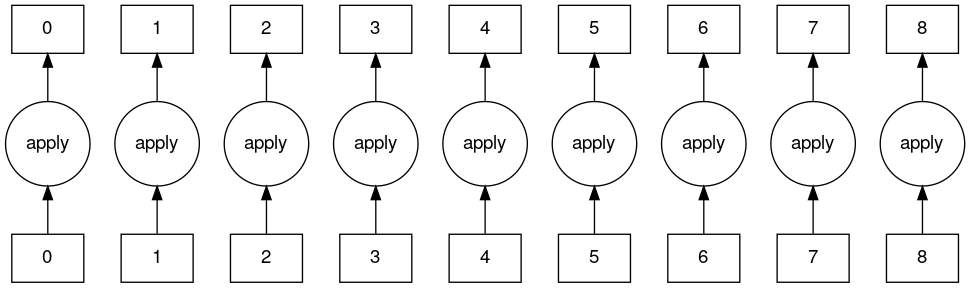

In [42]:
jvl_p_ddf.visualize()

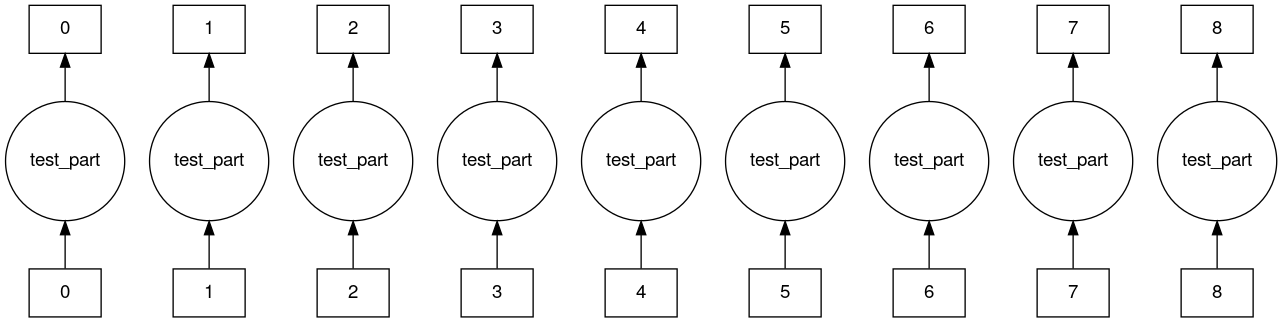

In [55]:
jvl_p_ddf.visualize()

In [24]:
cluster.scale(2)

In [25]:
!squeue -u $USER

            JOBID     USER              ACCOUNT           NAME  ST  TIME_LEFT NODES CPUS TRES_PER_N MIN_MEM NODELIST (REASON) 
         11488249    rahit     def-mtarailo_cpu    dask-worker   R       9:59     1    8        N/A     15G gra585 (None) 
         11488250    rahit     def-mtarailo_cpu    dask-worker   R       9:59     1    8        N/A     15G gra722 (None) 
         11486814    rahit     def-mtarailo_cpu    interactive   R      50:39     1    1        N/A     16G gra827 (None) 


[09/26/23 01:18:36] INFO     Register worker <WorkerState 'tcp://10.29.84.83:44830', name:        ]8;id=972171;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py\scheduler.py]8;;\:]8;id=956815;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py#4212\4212]8;;\
                             SLURMCluster-1, status: init, memory: 0, processing: 0>                               

                    INFO     Starting worker compute stream, tcp://10.29.84.83:44830              ]8;id=894151;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py\scheduler.py]8;;\:]8;id=614284;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py#5468\5468]8;;\

                    INFO     Starting established connection to tcp://10.29.84.83:34034                 ]8;id=960708;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py\core.py]8;;\:]8;id=56723;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py#867\867]8;;\

[09/26/23 01:18:38] INFO     Register worker <WorkerState 'tcp://10.29.83.138:37224', name:       ]8;id=362842;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py\scheduler.py]8;;\:]8;id=617528;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py#4212\4212]8;;\
                             SLURMCluster-0, status: init, memory: 0, processing: 0>                               

                    INFO     Starting worker compute stream, tcp://10.29.83.138:37224             ]8;id=379291;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py\scheduler.py]8;;\:]8;id=19824;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py#5468\5468]8;;\

                    INFO     Starting established connection to tcp://10.29.83.138:37660                ]8;id=189819;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py\core.py]8;;\:]8;id=982156;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py#867\867]8;;\

In [57]:
jvl_p_df = jvl_p_ddf.compute()

[09/25/23 17:14:05] INFO     Receive client connection:                                           ]8;id=357832;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py\scheduler.py]8;;\:]8;id=785193;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py#5228\5228]8;;\
                             Client-worker-6f3ced76-5be8-11ee-99e3-707990595d46                                    

                    INFO     Starting established connection to tcp://10.29.84.7:58146                  ]8;id=764138;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py\core.py]8;;\:]8;id=306206;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py#867\867]8;;\

In [58]:
jvl_p_df

0    Delayed('test_part-6887175b-eb2a-4b31-8ba7-09a...
1    Delayed('test_part-c30b092a-e571-4a5f-8aea-54c...
2    Delayed('test_part-bd7509af-4267-4513-bed1-c2c...
3    Delayed('test_part-e4c67f60-2c0b-48c1-8792-4f7...
4    Delayed('test_part-0cb7e796-58b3-4d93-a035-d21...
5    Delayed('test_part-fad42abc-330c-432d-bbb9-27b...
6    Delayed('test_part-7af4ec8f-852b-4d3c-9a56-529...
7    Delayed('test_part-0b32c2eb-111c-4ce6-8f13-d21...
8    Delayed('test_part-9045f651-aaed-4760-8f10-f36...
dtype: object

In [59]:
# compute the results
import dask
computed_results = dask.compute(*jvl_p_df)

[09/25/23 17:14:52] INFO     Event loop was unresponsive in Scheduler for 13.46s.  This is often caused ]8;id=60936;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py\core.py]8;;\:]8;id=136674;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py#595\595]8;;\
                             by long-running GIL-holding functions or moving large chunks of data. This            
                             can cause timeouts and instability.                                                   

[09/25/23 17:14:53] INFO     Receive client connection:                                           ]8;id=567548;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py\scheduler.py]8;;\:]8;id=715683;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py#5228\5228]8;;\
                             Client-worker-9242fa9d-5be8-11ee-92fc-3cfdfe74fab1                                    

                    INFO     Starting established connection to tcp://10.29.85.165:47878                ]8;id=411382;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py\core.py]8;;\:]8;id=717840;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py#867\867]8;;\

[09/25/23 17:15:56] INFO     Connection to tcp://10.29.84.7:58076 has been closed.                      ]8;id=477333;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py\core.py]8;;\:]8;id=293048;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py#877\877]8;;\

                    INFO     Remove worker <WorkerState 'tcp://10.29.84.7:39550', name:           ]8;id=764715;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py\scheduler.py]8;;\:]8;id=292090;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py#4795\4795]8;;\
                             SLURMCluster-0, status: running, memory: 1, processing: 5>                            

                    INFO     Removing comms to tcp://10.29.84.7:39550                                  ]8;id=415758;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py\core.py]8;;\:]8;id=225031;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py#1480\1480]8;;\

                    INFO     Connection to tcp://10.29.84.7:58146 has been closed.                      ]8;id=653188;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py\core.py]8;;\:]8;id=421764;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py#877\877]8;;\

                    INFO     Remove client Client-worker-6f3ced76-5be8-11ee-99e3-707990595d46     ]8;id=748471;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py\scheduler.py]8;;\:]8;id=843557;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py#5272\5272]8;;\

                    INFO     Connection to tcp://10.29.85.165:47792 has been closed.                    ]8;id=766650;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py\core.py]8;;\:]8;id=922362;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py#877\877]8;;\

                    INFO     Remove worker <WorkerState 'tcp://10.29.85.165:39873', name:         ]8;id=370958;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py\scheduler.py]8;;\:]8;id=940554;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py#4795\4795]8;;\
                             SLURMCluster-1, status: running, memory: 0, processing: 9>                            

                    INFO     Removing comms to tcp://10.29.85.165:39873                                ]8;id=602994;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py\core.py]8;;\:]8;id=520754;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py#1480\1480]8;;\

                    INFO     Lost all workers                                                     ]8;id=347613;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py\scheduler.py]8;;\:]8;id=307083;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py#4875\4875]8;;\

                    INFO     Connection to tcp://10.29.85.165:47878 has been closed.                    ]8;id=892455;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py\core.py]8;;\:]8;id=424900;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py#877\877]8;;\

                    INFO     Remove client Client-worker-9242fa9d-5be8-11ee-92fc-3cfdfe74fab1     ]8;id=975629;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py\scheduler.py]8;;\:]8;id=330264;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py#5272\5272]8;;\

                    INFO     Batched Comm Closed <TCP (closed) Scheduler->Client                     ]8;id=333764;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/batched.py\batched.py]8;;\:]8;id=314905;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/batched.py#122\122]8;;\
                             local=tcp://10.29.81.255:40268 remote=tcp://10.29.85.165:47878>                       
                             ╭───────────────── Traceback (most recent call last) ─────────────────╮               
                             │ /home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/com │               
                             │ m/tcp.py:317 in write                                               │               
                             │                                                                     │               
                             │   314 │   │   │   │   │   │   chunk_nbytes = chunk.nbytes           │               
                             │   315 │   │   │   │   │   │                                         │               
                             │   316 │   │   │   │   │   │   if stream._write_buffer is None:      │               
                             │ ❱ 317 │   │   │   │   │   │   │   raise StreamClosedError()         │               
                             │   318 │   │   │   │   │   │                                         │               
                             │   319 │   │   │   │   │   │   stream._write_buffer.append(chunk)    │               
                             │   320 │   │   │   │   │   │   stream._total_write_index += chunk_nb │               
                             ╰─────────────────────────────────────────────────────────────────────╯               
                             StreamClosedError: Stream is closed                                                   
                                                                                                                   
                             The above exception was the direct cause of the following exception:                  
                                                                                                                   
                             ╭───────────────── Traceback (most recent call last) ─────────────────╮               
                             │ /home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/bat │               
                             │ ched.py:115 in _background_send                                     │               
                             │                                                                     │               
                             │   112 │   │   │   │   │   │   payload, serializers=self.serializers │               
                             │   113 │   │   │   │   │   )                                         │               
                             │   114 │   │   │   │   ) as coro:                                    │               
                             │ ❱ 115 │   │   │   │   │   nbytes = yield coro                       │               
                             │   116 │   │   │   │   if nbytes < 1e6:                              │               
                             │   117 │   │   │   │   │   self.recent_message_log.append(payload)   │               
                             │   118 │   │   │   │   else:                                         │               
                             │                                                                     │               
                             │ /home/rahit/jupyter_py3/lib/python3.8/site-packages/tornado/gen.py: │               
                             │ 762 in run                                                          │               
                             │                                              

                    INFO     Batched Comm Closed <TCP (closed) Scheduler->Client                     ]8;id=586700;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/batched.py\batched.py]8;;\:]8;id=879528;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/batched.py#122\122]8;;\
                             local=tcp://10.29.81.255:40268 remote=tcp://10.29.84.7:58146>                         
                             ╭───────────────── Traceback (most recent call last) ─────────────────╮               
                             │ /home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/bat │               
                             │ ched.py:115 in _background_send                                     │               
                             │                                                                     │               
                             │   112 │   │   │   │   │   │   payload, serializers=self.serializers │               
                             │   113 │   │   │   │   │   )                                         │               
                             │   114 │   │   │   │   ) as coro:                                    │               
                             │ ❱ 115 │   │   │   │   │   nbytes = yield coro                       │               
                             │   116 │   │   │   │   if nbytes < 1e6:                              │               
                             │   117 │   │   │   │   │   self.recent_message_log.append(payload)   │               
                             │   118 │   │   │   │   else:                                         │               
                             │                                                                     │               
                             │ /home/rahit/jupyter_py3/lib/python3.8/site-packages/tornado/gen.py: │               
                             │ 762 in run                                                          │               
                             │                                                                     │               
                             │   759 │   │   │   │   │   exc_info = None                           │               
                             │   760 │   │   │   │   │                                             │               
                             │   761 │   │   │   │   │   try:                                      │               
                             │ ❱ 762 │   │   │   │   │   │   value = future.result()               │               
                             │   763 │   │   │   │   │   except Exception:                         │               
                             │   764 │   │   │   │   │   │   exc_info = sys.exc_info()             │               
                             │   765 │   │   │   │   │   future = None                             │               
                             │                                                                     │               
                             │ /home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/com │               
                             │ m/tcp.py:269 in write                                               │               
                             │                                                                     │               
                             │   266 │   async def write(self, msg, serializers=None, on_error="me │               
                             │   267 │   │   stream = self.stream                                  │               
                             │   268 │   │   if stream is None:                                    │               
                             │ ❱ 269 │   │   │   raise CommClosedError()                           │               
                             │   270 │   │                                  

                    INFO     Batched Comm Closed <TCP (closed) Scheduler connection to worker        ]8;id=557367;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/batched.py\batched.py]8;;\:]8;id=784472;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/batched.py#122\122]8;;\
                             local=tcp://10.29.81.255:40268 remote=tcp://10.29.85.165:47792>                       
                             ╭───────────────── Traceback (most recent call last) ─────────────────╮               
                             │ /home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/com │               
                             │ m/tcp.py:317 in write                                               │               
                             │                                                                     │               
                             │   314 │   │   │   │   │   │   chunk_nbytes = chunk.nbytes           │               
                             │   315 │   │   │   │   │   │                                         │               
                             │   316 │   │   │   │   │   │   if stream._write_buffer is None:      │               
                             │ ❱ 317 │   │   │   │   │   │   │   raise StreamClosedError()         │               
                             │   318 │   │   │   │   │   │                                         │               
                             │   319 │   │   │   │   │   │   stream._write_buffer.append(chunk)    │               
                             │   320 │   │   │   │   │   │   stream._total_write_index += chunk_nb │               
                             ╰─────────────────────────────────────────────────────────────────────╯               
                             StreamClosedError: Stream is closed                                                   
                                                                                                                   
                             The above exception was the direct cause of the following exception:                  
                                                                                                                   
                             ╭───────────────── Traceback (most recent call last) ─────────────────╮               
                             │ /home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/bat │               
                             │ ched.py:115 in _background_send                                     │               
                             │                                                                     │               
                             │   112 │   │   │   │   │   │   payload, serializers=self.serializers │               
                             │   113 │   │   │   │   │   )                                         │               
                             │   114 │   │   │   │   ) as coro:                                    │               
                             │ ❱ 115 │   │   │   │   │   nbytes = yield coro                       │               
                             │   116 │   │   │   │   if nbytes < 1e6:                              │               
                             │   117 │   │   │   │   │   self.recent_message_log.append(payload)   │               
                             │   118 │   │   │   │   else:                                         │               
                             │                                                                     │               
                             │ /home/rahit/jupyter_py3/lib/python3.8/site-packages/tornado/gen.py: │               
                             │ 762 in run                                                          │               
                             │                                              

[09/25/23 17:15:57] INFO     Close client connection:                                             ]8;id=659550;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py\scheduler.py]8;;\:]8;id=208101;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py#5264\5264]8;;\
                             Client-worker-9242fa9d-5be8-11ee-92fc-3cfdfe74fab1                                    

                    INFO     Close client connection:                                             ]8;id=967010;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py\scheduler.py]8;;\:]8;id=401011;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/scheduler.py#5264\5264]8;;\
                             Client-worker-6f3ced76-5be8-11ee-99e3-707990595d46                                    

[09/25/23 17:27:20] ERROR    Task exception was never retrieved                                 ]8;id=619111;file:///cvmfs/soft.computecanada.ca/easybuild/software/2020/avx2/Core/python/3.8.10/lib/python3.8/asyncio/base_events.py\base_events.py]8;;\:]8;id=753475;file:///cvmfs/soft.computecanada.ca/easybuild/software/2020/avx2/Core/python/3.8.10/lib/python3.8/asyncio/base_events.py#1707\1707]8;;\
                             future: <Task finished name='Task-211534'                                             
                             coro=<Client._gather.<locals>.wait() done, defined at                                 
                             /home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/cl                    
                             ient.py:2134> exception=AllExit()>                                                    
                             ╭────────────── Traceback (most recent call last) ───────────────╮                    
                             │ /home/rahit/jupyter_py3/lib/python3.8/site-packages/distribute │                    
                             │ d/client.py:2143 in wait                                       │                    
                             │                                                                │                    
                             │   2140 │   │   │   else:                                       │                    
                             │   2141 │   │   │   │   await st.wait()                         │                    
                             │   2142 │   │   │   if st.status != "finished" and errors == "r │                    
                             │ ❱ 2143 │   │   │   │   raise AllExit()                         │                    
                             │   2144 │   │                                                   │                    
                             │   2145 │   │   while True:                                     │                    
                             │   2146 │   │   │   logger.debug("Waiting on futures to clear b │                    
                             ╰────────────────────────────────────────────────────────────────╯                    
                             AllExit                                                                               

                    ERROR    Task exception was never retrieved                                 ]8;id=913129;file:///cvmfs/soft.computecanada.ca/easybuild/software/2020/avx2/Core/python/3.8.10/lib/python3.8/asyncio/base_events.py\base_events.py]8;;\:]8;id=706766;file:///cvmfs/soft.computecanada.ca/easybuild/software/2020/avx2/Core/python/3.8.10/lib/python3.8/asyncio/base_events.py#1707\1707]8;;\
                             future: <Task finished name='Task-211531'                                             
                             coro=<Client._gather.<locals>.wait() done, defined at                                 
                             /home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/cl                    
                             ient.py:2134> exception=AllExit()>                                                    
                             ╭────────────── Traceback (most recent call last) ───────────────╮                    
                             │ /home/rahit/jupyter_py3/lib/python3.8/site-packages/distribute │                    
                             │ d/client.py:2143 in wait                                       │                    
                             │                                                                │                    
                             │   2140 │   │   │   else:                                       │                    
                             │   2141 │   │   │   │   await st.wait()                         │                    
                             │   2142 │   │   │   if st.status != "finished" and errors == "r │                    
                             │ ❱ 2143 │   │   │   │   raise AllExit()                         │                    
                             │   2144 │   │                                                   │                    
                             │   2145 │   │   while True:                                     │                    
                             │   2146 │   │   │   logger.debug("Waiting on futures to clear b │                    
                             ╰────────────────────────────────────────────────────────────────╯                    
                             AllExit                                                                               

                    ERROR    Task exception was never retrieved                                 ]8;id=870238;file:///cvmfs/soft.computecanada.ca/easybuild/software/2020/avx2/Core/python/3.8.10/lib/python3.8/asyncio/base_events.py\base_events.py]8;;\:]8;id=33893;file:///cvmfs/soft.computecanada.ca/easybuild/software/2020/avx2/Core/python/3.8.10/lib/python3.8/asyncio/base_events.py#1707\1707]8;;\
                             future: <Task finished name='Task-211537'                                             
                             coro=<Client._gather.<locals>.wait() done, defined at                                 
                             /home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/cl                    
                             ient.py:2134> exception=AllExit()>                                                    
                             ╭────────────── Traceback (most recent call last) ───────────────╮                    
                             │ /home/rahit/jupyter_py3/lib/python3.8/site-packages/distribute │                    
                             │ d/client.py:2143 in wait                                       │                    
                             │                                                                │                    
                             │   2140 │   │   │   else:                                       │                    
                             │   2141 │   │   │   │   await st.wait()                         │                    
                             │   2142 │   │   │   if st.status != "finished" and errors == "r │                    
                             │ ❱ 2143 │   │   │   │   raise AllExit()                         │                    
                             │   2144 │   │                                                   │                    
                             │   2145 │   │   while True:                                     │                    
                             │   2146 │   │   │   logger.debug("Waiting on futures to clear b │                    
                             ╰────────────────────────────────────────────────────────────────╯                    
                             AllExit                                                                               

[09/25/23 17:27:21] ERROR    Task exception was never retrieved                                 ]8;id=908672;file:///cvmfs/soft.computecanada.ca/easybuild/software/2020/avx2/Core/python/3.8.10/lib/python3.8/asyncio/base_events.py\base_events.py]8;;\:]8;id=345227;file:///cvmfs/soft.computecanada.ca/easybuild/software/2020/avx2/Core/python/3.8.10/lib/python3.8/asyncio/base_events.py#1707\1707]8;;\
                             future: <Task finished name='Task-211535'                                             
                             coro=<Client._gather.<locals>.wait() done, defined at                                 
                             /home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/cl                    
                             ient.py:2134> exception=AllExit()>                                                    
                             ╭────────────── Traceback (most recent call last) ───────────────╮                    
                             │ /home/rahit/jupyter_py3/lib/python3.8/site-packages/distribute │                    
                             │ d/client.py:2143 in wait                                       │                    
                             │                                                                │                    
                             │   2140 │   │   │   else:                                       │                    
                             │   2141 │   │   │   │   await st.wait()                         │                    
                             │   2142 │   │   │   if st.status != "finished" and errors == "r │                    
                             │ ❱ 2143 │   │   │   │   raise AllExit()                         │                    
                             │   2144 │   │                                                   │                    
                             │   2145 │   │   while True:                                     │                    
                             │   2146 │   │   │   logger.debug("Waiting on futures to clear b │                    
                             ╰────────────────────────────────────────────────────────────────╯                    
                             AllExit                                                                               

                    ERROR    Task exception was never retrieved                                 ]8;id=462267;file:///cvmfs/soft.computecanada.ca/easybuild/software/2020/avx2/Core/python/3.8.10/lib/python3.8/asyncio/base_events.py\base_events.py]8;;\:]8;id=773243;file:///cvmfs/soft.computecanada.ca/easybuild/software/2020/avx2/Core/python/3.8.10/lib/python3.8/asyncio/base_events.py#1707\1707]8;;\
                             future: <Task finished name='Task-211533'                                             
                             coro=<Client._gather.<locals>.wait() done, defined at                                 
                             /home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/cl                    
                             ient.py:2134> exception=AllExit()>                                                    
                             ╭────────────── Traceback (most recent call last) ───────────────╮                    
                             │ /home/rahit/jupyter_py3/lib/python3.8/site-packages/distribute │                    
                             │ d/client.py:2143 in wait                                       │                    
                             │                                                                │                    
                             │   2140 │   │   │   else:                                       │                    
                             │   2141 │   │   │   │   await st.wait()                         │                    
                             │   2142 │   │   │   if st.status != "finished" and errors == "r │                    
                             │ ❱ 2143 │   │   │   │   raise AllExit()                         │                    
                             │   2144 │   │                                                   │                    
                             │   2145 │   │   while True:                                     │                    
                             │   2146 │   │   │   logger.debug("Waiting on futures to clear b │                    
                             ╰────────────────────────────────────────────────────────────────╯                    
                             AllExit                                                                               

                    ERROR    Task exception was never retrieved                                 ]8;id=774631;file:///cvmfs/soft.computecanada.ca/easybuild/software/2020/avx2/Core/python/3.8.10/lib/python3.8/asyncio/base_events.py\base_events.py]8;;\:]8;id=597356;file:///cvmfs/soft.computecanada.ca/easybuild/software/2020/avx2/Core/python/3.8.10/lib/python3.8/asyncio/base_events.py#1707\1707]8;;\
                             future: <Task finished name='Task-211530'                                             
                             coro=<Client._gather.<locals>.wait() done, defined at                                 
                             /home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/cl                    
                             ient.py:2134> exception=AllExit()>                                                    
                             ╭────────────── Traceback (most recent call last) ───────────────╮                    
                             │ /home/rahit/jupyter_py3/lib/python3.8/site-packages/distribute │                    
                             │ d/client.py:2143 in wait                                       │                    
                             │                                                                │                    
                             │   2140 │   │   │   else:                                       │                    
                             │   2141 │   │   │   │   await st.wait()                         │                    
                             │   2142 │   │   │   if st.status != "finished" and errors == "r │                    
                             │ ❱ 2143 │   │   │   │   raise AllExit()                         │                    
                             │   2144 │   │                                                   │                    
                             │   2145 │   │   while True:                                     │                    
                             │   2146 │   │   │   logger.debug("Waiting on futures to clear b │                    
                             ╰────────────────────────────────────────────────────────────────╯                    
                             AllExit                                                                               

[09/25/23 17:27:22] ERROR    Task exception was never retrieved                                 ]8;id=396859;file:///cvmfs/soft.computecanada.ca/easybuild/software/2020/avx2/Core/python/3.8.10/lib/python3.8/asyncio/base_events.py\base_events.py]8;;\:]8;id=912672;file:///cvmfs/soft.computecanada.ca/easybuild/software/2020/avx2/Core/python/3.8.10/lib/python3.8/asyncio/base_events.py#1707\1707]8;;\
                             future: <Task finished name='Task-211532'                                             
                             coro=<Client._gather.<locals>.wait() done, defined at                                 
                             /home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/cl                    
                             ient.py:2134> exception=AllExit()>                                                    
                             ╭────────────── Traceback (most recent call last) ───────────────╮                    
                             │ /home/rahit/jupyter_py3/lib/python3.8/site-packages/distribute │                    
                             │ d/client.py:2143 in wait                                       │                    
                             │                                                                │                    
                             │   2140 │   │   │   else:                                       │                    
                             │   2141 │   │   │   │   await st.wait()                         │                    
                             │   2142 │   │   │   if st.status != "finished" and errors == "r │                    
                             │ ❱ 2143 │   │   │   │   raise AllExit()                         │                    
                             │   2144 │   │                                                   │                    
                             │   2145 │   │   while True:                                     │                    
                             │   2146 │   │   │   logger.debug("Waiting on futures to clear b │                    
                             ╰────────────────────────────────────────────────────────────────╯                    
                             AllExit                                                                               

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:3                                                                                    │
│                                                                                                  │
│   1 # compute the results                                                                        │
│   2 import dask                                                                                  │
│ ❱ 3 computed_results = dask.compute(*jvl_p_df)                                                   │
│   4                                                                                              │
│                                                                                                  │
│ /home/rahit/jupyter_py3/lib/python3.8/site-packages/dask/base.py:599 in compute                  │
│                                                                                                  │
│    596 │   │   keys.append(x.__dask_keys__())                                                    │
│    597 │   │   postcomputes.append(x.__dask_postcompute__())                                     │
│    598 │                                                                                         │
│ ❱  599 │   results = schedule(dsk, keys, **kwargs)                                               │
│    600 │   return repack([f(r, *a) for r, (f, a) in zip(results, postcomputes)])                 │
│    601                                                                                           │
│    602                                                                                           │
│                                                                                                  │
│ /home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/client.py:3137 in get            │
│                                                                                                  │
│   3134 │   │   │   │   except Exception:                                                         │
│   3135 │   │   │   │   │   should_rejoin = False                                                 │
│   3136 │   │   │   try:                                                                          │
│ ❱ 3137 │   │   │   │   results = self.gather(packed, asynchronous=asynchronous, direct=direct)   │
│   3138 │   │   │   finally:                                                                      │
│   3139 │   │   │   │   for f in futures.values():                                                │
│   3140 │   │   │   │   │   f.release()                                                           │
│                                                                                                  │
│ /home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/client.py:2306 in gather         │
│                                                                                                  │
│   2303 │   │   │   │   local_worker = thread_state.execution_state["worker"]                     │
│   2304 │   │   │   else:                                                                         │
│   2305 │   │   │   │   local_worker = None                                                       │
│ ❱ 2306 │   │   │   return self.sync(                                                             │
│   2307 │   │   │   │   self._gather,                                                             │
│   2308 │   │   │   │   futures,                                                                  │
│   2309 │   │   │   │   errors=errors,                                                            │
│                                                                                                  │
│ /home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/utils.py:338 in sync             │
│                                                            

                    ERROR    Task exception was never retrieved                                 ]8;id=153583;file:///cvmfs/soft.computecanada.ca/easybuild/software/2020/avx2/Core/python/3.8.10/lib/python3.8/asyncio/base_events.py\base_events.py]8;;\:]8;id=675843;file:///cvmfs/soft.computecanada.ca/easybuild/software/2020/avx2/Core/python/3.8.10/lib/python3.8/asyncio/base_events.py#1707\1707]8;;\
                             future: <Task finished name='Task-211536'                                             
                             coro=<Client._gather.<locals>.wait() done, defined at                                 
                             /home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/cl                    
                             ient.py:2134> exception=AllExit()>                                                    
                             ╭────────────── Traceback (most recent call last) ───────────────╮                    
                             │ /home/rahit/jupyter_py3/lib/python3.8/site-packages/distribute │                    
                             │ d/client.py:2143 in wait                                       │                    
                             │                                                                │                    
                             │   2140 │   │   │   else:                                       │                    
                             │   2141 │   │   │   │   await st.wait()                         │                    
                             │   2142 │   │   │   if st.status != "finished" and errors == "r │                    
                             │ ❱ 2143 │   │   │   │   raise AllExit()                         │                    
                             │   2144 │   │                                                   │                    
                             │   2145 │   │   while True:                                     │                    
                             │   2146 │   │   │   logger.debug("Waiting on futures to clear b │                    
                             ╰────────────────────────────────────────────────────────────────╯                    
                             AllExit                                                                               

[09/25/23 17:27:23] ERROR    Task exception was never retrieved                                 ]8;id=128160;file:///cvmfs/soft.computecanada.ca/easybuild/software/2020/avx2/Core/python/3.8.10/lib/python3.8/asyncio/base_events.py\base_events.py]8;;\:]8;id=941521;file:///cvmfs/soft.computecanada.ca/easybuild/software/2020/avx2/Core/python/3.8.10/lib/python3.8/asyncio/base_events.py#1707\1707]8;;\
                             future: <Task finished name='Task-211529'                                             
                             coro=<Client._gather.<locals>.wait() done, defined at                                 
                             /home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/cl                    
                             ient.py:2134> exception=AllExit()>                                                    
                             ╭────────────── Traceback (most recent call last) ───────────────╮                    
                             │ /home/rahit/jupyter_py3/lib/python3.8/site-packages/distribute │                    
                             │ d/client.py:2143 in wait                                       │                    
                             │                                                                │                    
                             │   2140 │   │   │   else:                                       │                    
                             │   2141 │   │   │   │   await st.wait()                         │                    
                             │   2142 │   │   │   if st.status != "finished" and errors == "r │                    
                             │ ❱ 2143 │   │   │   │   raise AllExit()                         │                    
                             │   2144 │   │                                                   │                    
                             │   2145 │   │   while True:                                     │                    
                             │   2146 │   │   │   logger.debug("Waiting on futures to clear b │                    
                             ╰────────────────────────────────────────────────────────────────╯                    
                             AllExit                                                                               

                    INFO     Event loop was unresponsive in Scheduler for 3.28s.  This is often caused  ]8;id=17266;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py\core.py]8;;\:]8;id=716637;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/core.py#595\595]8;;\
                             by long-running GIL-holding functions or moving large chunks of data. This            
                             can cause timeouts and instability.                                                   

In [45]:
jvl_p_df

0    Delayed('test_part-54b3e0e9-e359-456c-80c7-7f3...
1    Delayed('test_part-b655dfa9-458a-4cc7-b91f-7be...
2    Delayed('test_part-983e2bc3-611f-4e93-a918-9be...
3    Delayed('test_part-db55305a-c5d7-42a0-8c6e-14c...
4    Delayed('test_part-ea7385b9-84f9-4434-b2c9-2af...
5    Delayed('test_part-05fd4dea-4ddc-4e92-9ef9-dc5...
6    Delayed('test_part-173e74a1-9d48-413e-9194-c5b...
7    Delayed('test_part-68b6a979-60f8-486d-84be-1d1...
8    Delayed('test_part-67b6f66a-4479-4f98-8063-513...
dtype: object

In [37]:
# Adding proteing alias to JVL data as dask dataframe
meta_data = {
        'protein1': 'object',
        'protein2': 'object'
}

jvl_p_ddf = jvl_smpld.apply(add_protein_alias, args=(protein_alias_df_future, ('QueryGene', 'SuppressorGene')), axis=1, meta=meta_data)
jvl_p_df = jvl_p_ddf.compute()

[09/23/23 03:35:50] INFO     Failed to serialize                                                       ]8;id=379331;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/protocol/pickle.py\pickle.py]8;;\:]8;id=9018;file:///home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/protocol/pickle.py#60\60]8;;\
                             subgraph_callable-3d1aa36c-5d0d-4344-baf6-a64c4d3dcac9. Exception: cannot             
                             pickle '_thread.lock' object                                                          

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/worker.py:2937 in dumps_function │
│                                                                                                  │
│   2934 │   """Dump a function to bytes, cache functions"""                                       │
│   2935 │   try:                                                                                  │
│   2936 │   │   with _cache_lock:                                                                 │
│ ❱ 2937 │   │   │   result = cache_dumps[func]                                                    │
│   2938 │   except KeyError:                                                                      │
│   2939 │   │   result = pickle.dumps(func)                                                       │
│   2940 │   │   if len(result) < 100000:                                                          │
│                                                                                                  │
│ /home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/collections.py:24 in __getitem__ │
│                                                                                                  │
│    21 │   │   self.maxsize = maxsize                                                             │
│    22 │                                                                                          │
│    23 │   def __getitem__(self, key):                                                            │
│ ❱  24 │   │   value = super().__getitem__(key)                                                   │
│    25 │   │   cast(OrderedDict, self.data).move_to_end(key)                                      │
│    26 │   │   return value                                                                       │
│    27                                                                                            │
│                                                                                                  │
│ /cvmfs/soft.computecanada.ca/easybuild/software/2020/avx2/Core/python/3.8.10/lib/python3.8/colle │
│ ctions/__init__.py:1010 in __getitem__                                                           │
│                                                                                                  │
│   1007 │   │   │   return self.data[key]                                                         │
│   1008 │   │   if hasattr(self.__class__, "__missing__"):                                        │
│   1009 │   │   │   return self.__class__.__missing__(self, key)                                  │
│ ❱ 1010 │   │   raise KeyError(key)                                                               │
│   1011 │   def __setitem__(self, key, item): self.data[key] = item                               │
│   1012 │   def __delitem__(self, key): del self.data[key]                                        │
│   1013 │   def __iter__(self):                                                                   │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyError: subgraph_callable-3d1aa36c-5d0d-4344-baf6-a64c4d3dcac9

During handling of the above exception, another exception occurred:

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /home/rahit/jupyter_py3/lib/python3.8/site-packages/distributed/protocol/pickle.py:54 in dumps   │
│                                                                                                  │
│   51 │   │   ):                                                                                  │
│   52 │   │   │   if len(result) < 1000 or not _always_use_pickle_for(x):                         │
│   53 │   │   │   │   buffers.clear()                                                             │
│ ❱ 54 │   │   │   │   resu

In [64]:

def add_protein_interaction(ddf, protein_interaction_df, protein_alias_df, col_names=('target_gene_symbol', 'gene_symbol')):
    cols = list(protein_interaction_df.columns)
    cols_dtype = {
        'protein1': 'object',
        'protein2': 'object'
    }
    for c in cols:
        cols_dtype[c] = 'float32'
    jvl_int_ddf = ddf.apply(get_interaction_score, 
                          args=(protein_interaction_df, protein_alias_df, col_names),
                          axis=1, meta=cols_dtype)
    jvl_int_ddf.compute()
    return jvl_int

In [82]:
import pickle
protein_interaction_df = catalog.load('string_interactions')
protein_alias_df = catalog.load('string_alias')
pickle.dumps(protein_interaction_df)

[09/13/23 20:13:51] INFO     Loading data from 'string_interactions' (CSVDataSet)...            ]8;id=302597;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=80493;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\kedro\io\data_catalog.py#492\492]8;;\

[09/13/23 20:14:30] INFO     Loading data from 'string_alias' (CSVDataSet)...                   ]8;id=346258;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=651311;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\kedro\io\data_catalog.py#492\492]8;;\

                    WARNING  C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\l ]8;id=821630;file://C:\Users\Tahsin\AppData\Local\Programs\Python\Python38\lib\warnings.py\warnings.py]8;;\:]8;id=401943;file://C:\Users\Tahsin\AppData\Local\Programs\Python\Python38\lib\warnings.py#109\109]8;;\
                             ib\site-packages\kedro_datasets\pandas\csv_dataset.py:163:                            
                             ParserWarning: Falling back to the 'python' engine because the 'c'                    
                             engine does not support regex separators (separators > 1 char and                     
                             different from '\s+' are interpreted as regex); you can avoid this                    
                             warning by specifying engine='python'.                                                
                               return pd.read_csv(load_path, **self._load_args)                                    
                                                                                                                   

[09/13/23 20:15:00] INFO     Event loop was unresponsive in Scheduler for 4.83s.  This is often caused  ]8;id=72266;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\core.py\core.py]8;;\:]8;id=835738;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\core.py#697\697]8;;\
                             by long-running GIL-holding functions or moving large chunks of data. This            
                             can cause timeouts and instability.                                                   

[09/13/23 20:15:22] INFO     Event loop was unresponsive in Nanny for 26.14s.  This is often caused by  ]8;id=600392;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\core.py\core.py]8;;\:]8;id=969092;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\core.py#697\697]8;;\
                             long-running GIL-holding functions or moving large chunks of data. This               
                             can cause timeouts and instability.                                                   

[09/13/23 20:15:44] INFO     Event loop was unresponsive in Nanny for 48.18s.  This is often caused by  ]8;id=901135;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\core.py\core.py]8;;\:]8;id=64495;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\core.py#697\697]8;;\
                             long-running GIL-holding functions or moving large chunks of data. This               
                             can cause timeouts and instability.                                                   

[09/13/23 20:15:45] INFO     Event loop was unresponsive in Scheduler for 44.20s.  This is often caused ]8;id=740245;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\core.py\core.py]8;;\:]8;id=514986;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\core.py#697\697]8;;\
                             by long-running GIL-holding functions or moving large chunks of data. This            
                             can cause timeouts and instability.                                                   

                    INFO     Event loop was unresponsive in Nanny for 22.90s.  This is often caused by  ]8;id=809906;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\core.py\core.py]8;;\:]8;id=883931;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\core.py#697\697]8;;\
                             long-running GIL-holding functions or moving large chunks of data. This               
                             can cause timeouts and instability.                                                   

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:4                                                                                    │
│                                                                                                  │
│   1 import pickle                                                                                │
│   2 protein_interaction_df = catalog.load('string_interactions')                                 │
│   3 protein_alias_df = catalog.load('string_alias')                                              │
│ ❱ 4 pickle.dumps(protein_interaction_df)                                                         │
│   5                                                                                              │
│                                                                                                  │
│ C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\IPython\c │
│ ore\displayhook.py:268 in __call__                                                               │
│                                                                                                  │
│   265 │   │   if result is not None and not self.quiet():                                        │
│   266 │   │   │   self.start_displayhook()                                                       │
│   267 │   │   │   self.write_output_prompt()                                                     │
│ ❱ 268 │   │   │   format_dict, md_dict = self.compute_format_data(result)                        │
│   269 │   │   │   self.update_user_ns(result)                                                    │
│   270 │   │   │   self.fill_exec_result(result)                                                  │
│   271 │   │   │   if format_dict:                                                                │
│                                                                                                  │
│ C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\IPython\c │
│ ore\displayhook.py:157 in compute_format_data                                                    │
│                                                                                                  │
│   154 │   │   │   of metadata associated with each output.                                       │
│   155 │   │                                                                                      │
│   156 │   │   """                                                                                │
│ ❱ 157 │   │   return self.shell.display_formatter.format(result)                                 │
│   158 │                                                                                          │
│   159 │   # This can be set to True by the write_output_prompt method in a subclass              │
│   160 │   prompt_end_newline = False                                                             │
│                                                                                                  │
│ C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\IPython\c │
│ ore\formatters.py:179 in format                                                                  │
│                                                                                                  │
│    176 │   │   │                                                                                 │
│    177 │   │   │   md = None                                                                     │
│    178 │   │   │   try:                                                                          │
│ ❱  179 │   │   │   │   data = formatter(obj)                                                     │
│    180 │   │   │   except:                                                                       │
│    181 │   │   │   │   # FIXME: log the exception          

[09/13/23 20:33:37] INFO     Event loop was unresponsive in Nanny for 76.46s.  This is often caused by  ]8;id=991386;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\core.py\core.py]8;;\:]8;id=44281;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\core.py#697\697]8;;\
                             long-running GIL-holding functions or moving large chunks of data. This               
                             can cause timeouts and instability.                                                   

                    INFO     Event loop was unresponsive in Nanny for 76.49s.  This is often caused by  ]8;id=771513;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\core.py\core.py]8;;\:]8;id=393980;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\core.py#697\697]8;;\
                             long-running GIL-holding functions or moving large chunks of data. This               
                             can cause timeouts and instability.                                                   

                    INFO     Event loop was unresponsive in Scheduler for 76.50s.  This is often caused ]8;id=361316;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\core.py\core.py]8;;\:]8;id=484922;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\core.py#697\697]8;;\
                             by long-running GIL-holding functions or moving large chunks of data. This            
                             can cause timeouts and instability.                                                   

In [35]:
meta_data = {
        'protein1': 'object',
        'protein2': 'object'
}

jvl_p_ddf = jvl_ddf.map_partitions(add_stringdb_partition, meta=meta_data)
jvl_p_df = jvl_p_ddf.compute()

[09/22/23 01:13:24] ERROR    Failed to serialize <ToPickle: HighLevelGraph with 2 layers.              ]8;id=874575;file:///home/rahit/projects/def-mtarailo/rahit/python_environments/.modspy310/lib/python3.10/site-packages/distributed/protocol/pickle.py\pickle.py]8;;\:]8;id=210112;file:///home/rahit/projects/def-mtarailo/rahit/python_environments/.modspy310/lib/python3.10/site-packages/distributed/protocol/pickle.py#83\83]8;;\
                             <dask.highlevelgraph.HighLevelGraph object at 0x2b35f47185e0>                         
                              0. from_pandas-a2fdbfdf5ccb3d359573cab9416abe56                                      
                              1. add_stringdb_partition-9ef95b4a4dd65f2f1f324a675aa59dd0                           
                             >.                                                                                    
                             ╭────────────────── Traceback (most recent call last) ──────────────────╮             
                             │ /home/rahit/projects/def-mtarailo/rahit/python_environments/.modspy31 │             
                             │ 0/lib/python3.10/site-packages/distributed/protocol/pickle.py:77 in   │             
                             │ dumps                                                                 │             
                             │                                                                       │             
                             │    74 │   │   ):                                                      │             
                             │    75 │   │   │   if len(result) < 1000 or not _always_use_pickle_for │             
                             │    76 │   │   │   │   buffers.clear()                                 │             
                             │ ❱  77 │   │   │   │   result = cloudpickle.dumps(x, **dump_kwargs)    │             
                             │    78 │   except Exception:                                           │             
                             │    79 │   │   try:                                                    │             
                             │    80 │   │   │   buffers.clear()                                     │             
                             │                                                                       │             
                             │ /home/rahit/projects/def-mtarailo/rahit/python_environments/.modspy31 │             
                             │ 0/lib/python3.10/site-packages/cloudpickle/cloudpickle_fast.py:73 in  │             
                             │ dumps                                                                 │             
                             │                                                                       │             
                             │    70 │   │   │   cp = CloudPickler(                                  │             
                             │    71 │   │   │   │   file, protocol=protocol, buffer_callback=buffer │             
                             │    72 │   │   │   )                                                   │             
                             │ ❱  73 │   │   │   cp.dump(obj)                                        │             
                             │    74 │   │   │   return file.getvalue()                              │             
                             │    75                                                                 │             
                             │    76 else:                                                           │             
                             │                                                                       │             
                             │ /home/rahit/projects/def-mtarailo/rahit/python_environments/.modspy31 │             
                             │ 0/lib/python3.10/site-packages/cloudpickle/cloudpi

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /home/rahit/projects/def-mtarailo/rahit/python_environments/.modspy310/lib/python3.10/site-packa │
│ ges/distributed/protocol/pickle.py:77 in dumps                                                   │
│                                                                                                  │
│    74 │   │   ):                                                                                 │
│    75 │   │   │   if len(result) < 1000 or not _always_use_pickle_for(x):                        │
│    76 │   │   │   │   buffers.clear()                                                            │
│ ❱  77 │   │   │   │   result = cloudpickle.dumps(x, **dump_kwargs)                               │
│    78 │   except Exception:                                                                      │
│    79 │   │   try:                                                                               │
│    80 │   │   │   buffers.clear()                                                                │
│                                                                                                  │
│ /home/rahit/projects/def-mtarailo/rahit/python_environments/.modspy310/lib/python3.10/site-packa │
│ ges/cloudpickle/cloudpickle_fast.py:73 in dumps                                                  │
│                                                                                                  │
│    70 │   │   │   cp = CloudPickler(                                                             │
│    71 │   │   │   │   file, protocol=protocol, buffer_callback=buffer_callback                   │
│    72 │   │   │   )                                                                              │
│ ❱  73 │   │   │   cp.dump(obj)                                                                   │
│    74 │   │   │   return file.getvalue()                                                         │
│    75                                                                                            │
│    76 else:                                                                                      │
│                                                                                                  │
│ /home/rahit/projects/def-mtarailo/rahit/python_environments/.modspy310/lib/python3.10/site-packa │
│ ges/cloudpickle/cloudpickle_fast.py:632 in dump                                                  │
│                                                                                                  │
│   629 │                                                                                          │
│   630 │   def dump(self, obj):                                                                   │
│   631 │   │   try:                                                                               │
│ ❱ 632 │   │   │   return Pickler.dump(self, obj)                                                 │
│   633 │   │   except RuntimeError as e:                                                          │
│   634 │   │   │   if "recursion" in e.args[0]:                                                   │
│   635 │   │   │   │   msg = (                                                                    │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
TypeError: cannot pickle '_hashlib.HMAC' object

During handling of the above exception, another exception occurred:

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /home/rahit/projects/def-mtarailo/rahit/python_environments/.modspy310/lib/python3.10/site-packa │
│ ges/distributed/protocol/serialize.py:352 in serialize                                           │
│                                                                                                  │
│   349 │   for name in serializers:        

In [55]:
cols = list(protein_interaction_df.columns)
cols_dtype = {
    'protein1': 'object',
    'protein2': 'object'
}
for c in cols:
    cols_dtype[c] = 'float32'
jvl_df = jvl.apply(add_protein_alias, 
                      args=(protein_alias_df, ('QueryGene', 'SuppressorGene')),
                      axis=1)
# jvl_p_df = jvl_p_ddf.compute()

[09/13/23 18:54:45] INFO     Event loop was unresponsive in Nanny for 4.62s.  This is often caused by   ]8;id=188943;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\core.py\core.py]8;;\:]8;id=930020;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\core.py#697\697]8;;\
                             long-running GIL-holding functions or moving large chunks of data. This               
                             can cause timeouts and instability.                                                   

[09/13/23 18:54:46] INFO     Event loop was unresponsive in Scheduler for 4.66s.  This is often caused  ]8;id=385798;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\core.py\core.py]8;;\:]8;id=988315;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\core.py#697\697]8;;\
                             by long-running GIL-holding functions or moving large chunks of data. This            
                             can cause timeouts and instability.                                                   

                    INFO     Event loop was unresponsive in Nanny for 4.69s.  This is often caused by   ]8;id=533776;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\core.py\core.py]8;;\:]8;id=294998;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\core.py#697\697]8;;\
                             long-running GIL-holding functions or moving large chunks of data. This               
                             can cause timeouts and instability.                                                   

2023-09-13 18:54:50.279 | DEBUG    | __main__:get_string_protein_id:17 - Multiple proteins found for APOE
2023-09-13 18:54:53.519 | DEBUG    | __main__:get_string_protein_id:17 - Multiple proteins found for CASP7
2023-09-13 18:54:56.849 | DEBUG    | __main__:get_string_protein_id:17 - Multiple proteins found for APOE
2023-09-13 18:55:00.639 | DEBUG    | __main__:get_string_protein_id:17 - Multiple proteins found for HBB
2023-09-13 18:55:03.762 | DEBUG    | __main__:get_string_protein_id:17 - Multiple proteins found for APOE


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:8                                                                                    │
│                                                                                                  │
│    5 }                                                                                           │
│    6 for c in cols:                                                                              │
│    7 │   cols_dtype[c] = 'float32'                                                               │
│ ❱  8 jvl_df = jvl.apply(add_protein_alias,                                                       │
│    9 │   │   │   │   │     args=(protein_alias_df, ('QueryGene', 'SuppressorGene')),             │
│   10 │   │   │   │   │     axis=1)                                                               │
│   11 # jvl_p_df = jvl_p_ddf.compute()                                                            │
│                                                                                                  │
│ C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\pandas\co │
│ re\frame.py:9423 in apply                                                                        │
│                                                                                                  │
│    9420 │   │   │   args=args,                                                                   │
│    9421 │   │   │   kwargs=kwargs,                                                               │
│    9422 │   │   )                                                                                │
│ ❱  9423 │   │   return op.apply().__finalize__(self, method="apply")                             │
│    9424 │                                                                                        │
│    9425 │   def applymap(                                                                        │
│    9426 │   │   self, func: PythonFuncType, na_action: str | None = None, **kwargs               │
│                                                                                                  │
│ C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\pandas\co │
│ re\apply.py:678 in apply                                                                         │
│                                                                                                  │
│    675 │   │   elif self.raw:                                                                    │
│    676 │   │   │   return self.apply_raw()                                                       │
│    677 │   │                                                                                     │
│ ❱  678 │   │   return self.apply_standard()                                                      │
│    679 │                                                                                         │
│    680 │   def agg(self):                                                                        │
│    681 │   │   obj = self.obj                                                                    │
│                                                                                                  │
│ C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\pandas\co │
│ re\apply.py:798 in apply_standard                                                                │
│                                                                                                  │
│    795 │   │   return result                                                                     │
│    796 │                                                                                         │
│    797 │   def apply_standard(self):                                                             │
│ ❱  798 │   │   results, res_index = self.apply_series_gener

[09/13/23 18:58:02] INFO     Event loop was unresponsive in Scheduler for 3.68s.  This is often caused  ]8;id=849682;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\core.py\core.py]8;;\:]8;id=331782;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\core.py#697\697]8;;\
                             by long-running GIL-holding functions or moving large chunks of data. This            
                             can cause timeouts and instability.                                                   

[09/13/23 18:58:03] INFO     Event loop was unresponsive in Nanny for 4.13s.  This is often caused by   ]8;id=149759;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\core.py\core.py]8;;\:]8;id=342258;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\core.py#697\697]8;;\
                             long-running GIL-holding functions or moving large chunks of data. This               
                             can cause timeouts and instability.                                                   

                    INFO     Event loop was unresponsive in Nanny for 4.14s.  This is often caused by   ]8;id=829943;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\core.py\core.py]8;;\:]8;id=537438;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\core.py#697\697]8;;\
                             long-running GIL-holding functions or moving large chunks of data. This               
                             can cause timeouts and instability.                                                   

In [53]:
cols = list(protein_interaction_df.columns)
cols_dtype = {
    'protein1': 'object',
    'protein2': 'object'
}
for c in cols:
    cols_dtype[c] = 'float32'
jvl_p_ddf = jvl_ddf.apply(add_protein_alias, 
                      args=(protein_alias_df_delayed, ('QueryGene', 'SuppressorGene')),
                      axis=1, meta={
                                    'protein1': 'object',
                                    'protein2': 'object'
                                })
jvl_p_df = jvl_p_ddf.compute()

[09/13/23 14:19:05] ERROR    Failed to serialize <ToPickle: HighLevelGraph with 1 layers.              ]8;id=809669;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\protocol\pickle.py\pickle.py]8;;\:]8;id=288284;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\protocol\pickle.py#83\83]8;;\
                             <dask.highlevelgraph.HighLevelGraph object at 0x19412827280>                          
                              0. apply-8cdf0323ce7ea84dc31d6740b5e6b410                                            
                             >.                                                                                    
                             ╭────────────────── Traceback (most recent call last) ──────────────────╮             
                             │ C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\ │             
                             │ lib\site-packages\distributed\protocol\pickle.py:77 in dumps          │             
                             │                                                                       │             
                             │    74 │   │   ):                                                      │             
                             │    75 │   │   │   if len(result) < 1000 or not _always_use_pickle_for │             
                             │    76 │   │   │   │   buffers.clear()                                 │             
                             │ ❱  77 │   │   │   │   result = cloudpickle.dumps(x, **dump_kwargs)    │             
                             │    78 │   except Exception:                                           │             
                             │    79 │   │   try:                                                    │             
                             │    80 │   │   │   buffers.clear()                                     │             
                             │                                                                       │             
                             │ C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\ │             
                             │ lib\site-packages\cloudpickle\cloudpickle_fast.py:73 in dumps         │             
                             │                                                                       │             
                             │    70 │   │   │   cp = CloudPickler(                                  │             
                             │    71 │   │   │   │   file, protocol=protocol, buffer_callback=buffer │             
                             │    72 │   │   │   )                                                   │             
                             │ ❱  73 │   │   │   cp.dump(obj)                                        │             
                             │    74 │   │   │   return file.getvalue()                              │             
                             │    75                                                                 │             
                             │    76 else:                                                           │             
                             │                                                                       │             
                             │ C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\ │             
                             │ lib\site-packages\cloudpickle\cloudpickle_fast.py:632 in dump         │             
                             │                                                                       │             
                             │   629 │                                                               │             
                             │   630 │   def dump(self, obj):                                        │     

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distribut │
│ ed\protocol\pickle.py:77 in dumps                                                                │
│                                                                                                  │
│    74 │   │   ):                                                                                 │
│    75 │   │   │   if len(result) < 1000 or not _always_use_pickle_for(x):                        │
│    76 │   │   │   │   buffers.clear()                                                            │
│ ❱  77 │   │   │   │   result = cloudpickle.dumps(x, **dump_kwargs)                               │
│    78 │   except Exception:                                                                      │
│    79 │   │   try:                                                                               │
│    80 │   │   │   buffers.clear()                                                                │
│                                                                                                  │
│ C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\cloudpick │
│ le\cloudpickle_fast.py:73 in dumps                                                               │
│                                                                                                  │
│    70 │   │   │   cp = CloudPickler(                                                             │
│    71 │   │   │   │   file, protocol=protocol, buffer_callback=buffer_callback                   │
│    72 │   │   │   )                                                                              │
│ ❱  73 │   │   │   cp.dump(obj)                                                                   │
│    74 │   │   │   return file.getvalue()                                                         │
│    75                                                                                            │
│    76 else:                                                                                      │
│                                                                                                  │
│ C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\cloudpick │
│ le\cloudpickle_fast.py:632 in dump                                                               │
│                                                                                                  │
│   629 │                                                                                          │
│   630 │   def dump(self, obj):                                                                   │
│   631 │   │   try:                                                                               │
│ ❱ 632 │   │   │   return Pickler.dump(self, obj)                                                 │
│   633 │   │   except RuntimeError as e:                                                          │
│   634 │   │   │   if "recursion" in e.args[0]:                                                   │
│   635 │   │   │   │   msg = (                                                                    │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
TypeError: cannot pickle '_hashlib.HASH' object

During handling of the above exception, another exception occurred:

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distribut │
│ ed\protocol\serialize.py:350 in serialize                                                        │
│                                                                                                  │
│   347 │   for name in serializers:        

In [48]:
jvl_int = add_protein_interaction(jvl_ddf, protein_interaction_df, protein_alias_df, col_names=('QueryGene', 'SuppressorGene'))

[09/13/23 13:56:32] INFO     Event loop was unresponsive in Scheduler for 7.29s.  This is often caused  ]8;id=231823;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\core.py\core.py]8;;\:]8;id=733818;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\core.py#697\697]8;;\
                             by long-running GIL-holding functions or moving large chunks of data. This            
                             can cause timeouts and instability.                                                   

                    INFO     Event loop was unresponsive in Nanny for 7.37s.  This is often caused by   ]8;id=178202;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\core.py\core.py]8;;\:]8;id=77367;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\core.py#697\697]8;;\
                             long-running GIL-holding functions or moving large chunks of data. This               
                             can cause timeouts and instability.                                                   

                    INFO     Event loop was unresponsive in Nanny for 7.37s.  This is often caused by   ]8;id=873005;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\core.py\core.py]8;;\:]8;id=2935;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\core.py#697\697]8;;\
                             long-running GIL-holding functions or moving large chunks of data. This               
                             can cause timeouts and instability.                                                   

                    INFO     Event loop was unresponsive in Nanny for 7.37s.  This is often caused by   ]8;id=450963;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\core.py\core.py]8;;\:]8;id=372334;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\core.py#697\697]8;;\
                             long-running GIL-holding functions or moving large chunks of data. This               
                             can cause timeouts and instability.                                                   

                    INFO     Event loop was unresponsive in Nanny for 7.38s.  This is often caused by   ]8;id=186698;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\core.py\core.py]8;;\:]8;id=580083;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\core.py#697\697]8;;\
                             long-running GIL-holding functions or moving large chunks of data. This               
                             can cause timeouts and instability.                                                   

[09/13/23 13:56:38] INFO     Event loop was unresponsive in Nanny for 6.42s.  This is often caused by   ]8;id=342203;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\core.py\core.py]8;;\:]8;id=52163;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\core.py#697\697]8;;\
                             long-running GIL-holding functions or moving large chunks of data. This               
                             can cause timeouts and instability.                                                   

                    ERROR    Failed to serialize <ToPickle: HighLevelGraph with 1 layers.              ]8;id=317423;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\protocol\pickle.py\pickle.py]8;;\:]8;id=465701;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\protocol\pickle.py#83\83]8;;\
                             <dask.highlevelgraph.HighLevelGraph object at 0x193e7ecb880>                          
                              0. apply-61e22069ff2ea5cf38bca7c7aa354272                                            
                             >.                                                                                    
                             ╭────────────────── Traceback (most recent call last) ──────────────────╮             
                             │ C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\ │             
                             │ lib\site-packages\distributed\protocol\pickle.py:77 in dumps          │             
                             │                                                                       │             
                             │    74 │   │   ):                                                      │             
                             │    75 │   │   │   if len(result) < 1000 or not _always_use_pickle_for │             
                             │    76 │   │   │   │   buffers.clear()                                 │             
                             │ ❱  77 │   │   │   │   result = cloudpickle.dumps(x, **dump_kwargs)    │             
                             │    78 │   except Exception:                                           │             
                             │    79 │   │   try:                                                    │             
                             │    80 │   │   │   buffers.clear()                                     │             
                             │                                                                       │             
                             │ C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\ │             
                             │ lib\site-packages\cloudpickle\cloudpickle_fast.py:73 in dumps         │             
                             │                                                                       │             
                             │    70 │   │   │   cp = CloudPickler(                                  │             
                             │    71 │   │   │   │   file, protocol=protocol, buffer_callback=buffer │             
                             │    72 │   │   │   )                                                   │             
                             │ ❱  73 │   │   │   cp.dump(obj)                                        │             
                             │    74 │   │   │   return file.getvalue()                              │             
                             │    75                                                                 │             
                             │    76 else:                                                           │             
                             │                                                                       │             
                             │ C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\ │             
                             │ lib\site-packages\cloudpickle\cloudpickle_fast.py:632 in dump         │             
                             │                                                                       │             
                             │   629 │                                                               │             
                             │   630 │   def dump(self, obj):                                        │     

                    INFO     Event loop was unresponsive in Nanny for 6.86s.  This is often caused by   ]8;id=360703;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\core.py\core.py]8;;\:]8;id=509349;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\core.py#697\697]8;;\
                             long-running GIL-holding functions or moving large chunks of data. This               
                             can cause timeouts and instability.                                                   

[09/13/23 13:56:39] INFO     Event loop was unresponsive in Scheduler for 7.08s.  This is often caused  ]8;id=114944;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\core.py\core.py]8;;\:]8;id=333262;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\core.py#697\697]8;;\
                             by long-running GIL-holding functions or moving large chunks of data. This            
                             can cause timeouts and instability.                                                   

                    INFO     Event loop was unresponsive in Nanny for 7.00s.  This is often caused by   ]8;id=151456;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\core.py\core.py]8;;\:]8;id=507264;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\core.py#697\697]8;;\
                             long-running GIL-holding functions or moving large chunks of data. This               
                             can cause timeouts and instability.                                                   

                    INFO     Event loop was unresponsive in Nanny for 7.00s.  This is often caused by   ]8;id=961486;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\core.py\core.py]8;;\:]8;id=890118;file://C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distributed\core.py#697\697]8;;\
                             long-running GIL-holding functions or moving large chunks of data. This               
                             can cause timeouts and instability.                                                   

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distribut │
│ ed\protocol\pickle.py:77 in dumps                                                                │
│                                                                                                  │
│    74 │   │   ):                                                                                 │
│    75 │   │   │   if len(result) < 1000 or not _always_use_pickle_for(x):                        │
│    76 │   │   │   │   buffers.clear()                                                            │
│ ❱  77 │   │   │   │   result = cloudpickle.dumps(x, **dump_kwargs)                               │
│    78 │   except Exception:                                                                      │
│    79 │   │   try:                                                                               │
│    80 │   │   │   buffers.clear()                                                                │
│                                                                                                  │
│ C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\cloudpick │
│ le\cloudpickle_fast.py:73 in dumps                                                               │
│                                                                                                  │
│    70 │   │   │   cp = CloudPickler(                                                             │
│    71 │   │   │   │   file, protocol=protocol, buffer_callback=buffer_callback                   │
│    72 │   │   │   )                                                                              │
│ ❱  73 │   │   │   cp.dump(obj)                                                                   │
│    74 │   │   │   return file.getvalue()                                                         │
│    75                                                                                            │
│    76 else:                                                                                      │
│                                                                                                  │
│ C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\cloudpick │
│ le\cloudpickle_fast.py:632 in dump                                                               │
│                                                                                                  │
│   629 │                                                                                          │
│   630 │   def dump(self, obj):                                                                   │
│   631 │   │   try:                                                                               │
│ ❱ 632 │   │   │   return Pickler.dump(self, obj)                                                 │
│   633 │   │   except RuntimeError as e:                                                          │
│   634 │   │   │   if "recursion" in e.args[0]:                                                   │
│   635 │   │   │   │   msg = (                                                                    │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
TypeError: cannot pickle '_hashlib.HASH' object

During handling of the above exception, another exception occurred:

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ C:\Users\Tahsin\Documents\Projects\modspy-data\.env\.modspy-data-p38\lib\site-packages\distribut │
│ ed\protocol\serialize.py:350 in serialize                                                        │
│                                                                                                  │
│   347 │   for name in serializers:        

In [28]:
protein_alias_df[protein_alias_df["alias"].str.match(
        "^"+str('BBS4')+"$", case=False, na=False)]

,protein,alias,source
514943,9606.ENSP00000268057,BBS4,BioMart_HUGO
514944,9606.ENSP00000268057,BBS4,Ensembl_EntrezGene
514945,9606.ENSP00000268057,BBS4,Ensembl_HGNC
514946,9606.ENSP00000268057,BBS4,Ensembl_HGNC_symbol
514947,9606.ENSP00000268057,BBS4,Ensembl_UniProt
514948,9606.ENSP00000268057,BBS4,Ensembl_WikiGene
514949,9606.ENSP00000268057,BBS4,KEGG_NAME
514950,9606.ENSP00000268057,BBS4,UniProt_GN_Name
